<a href="https://colab.research.google.com/github/Vijayalakshmiboya/Credit_Card_Fraud_Detection/blob/main/credit_card_fraud_detection_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Step 2: Load Dataset
data = pd.read_csv("/creditcard.csv")

# Step 3: Handle Missing Values
# Drop rows where 'Class' is NaN
data = data.dropna(subset=["Class"])

# Fill NaN in features with 0 (or you can use mean/median)
data = data.fillna(0)

# Step 4: Features and Target
X = data.drop("Class", axis=1)
y = data["Class"]

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 6: Balance Training Data with SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Step 7: Scale Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Load Dataset & Preprocessing completed...!")



Load Dataset & Preprocessing completed...!


In [2]:
# Case 1: Plain SVM (Default Parameters)
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Initialize model
model_plain = SVC()

# Train model
model_plain.fit(X_train, y_train)

# Predictions
y_pred_plain = model_plain.predict(X_test)

# Evaluation
print("\nConfusion Matrix (Plain SVM):\n", confusion_matrix(y_test, y_pred_plain))
print("\nClassification Report (Plain SVM):\n", classification_report(y_test, y_pred_plain))



Confusion Matrix (Plain SVM):
 [[1590    0]
 [   1    4]]

Classification Report (Plain SVM):
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1590
         1.0       1.00      0.80      0.89         5

    accuracy                           1.00      1595
   macro avg       1.00      0.90      0.94      1595
weighted avg       1.00      1.00      1.00      1595



In [5]:
# Use smaller sample for tuning (10,000 rows)
from sklearn.model_selection import GridSearchCV

X_sample, _, y_sample, _ = train_test_split(
    X_train, y_train, train_size=10000, stratify=y_train, random_state=42
)

param_grid = {
    "C": [0.1, 1, 10],
    "gamma": [0.1, 0.01],
    "kernel": ["linear", "rbf"]
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=3, verbose=1, n_jobs=-1)
grid.fit(X_sample, y_sample)

print("\n--- GridSearchCV SVM ---")
print("Best Parameters:", grid.best_params_)

# Retrain best model on full dataset
best_grid_svm = grid.best_estimator_
best_grid_svm.fit(X_train, y_train)
y_pred_grid = best_grid_svm.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_grid))
print("\nClassification Report:\n", classification_report(y_test, y_pred_grid))


Fitting 3 folds for each of 12 candidates, totalling 36 fits

--- GridSearchCV SVM ---
Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Confusion Matrix:
 [[1590    0]
 [   1    4]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1590
         1.0       1.00      0.80      0.89         5

    accuracy                           1.00      1595
   macro avg       1.00      0.90      0.94      1595
weighted avg       1.00      1.00      1.00      1595



In [4]:
# Case 3: RandomizedSearchCV SVM
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    "C": np.logspace(-3, 3, 10),
    "gamma": np.logspace(-3, 3, 10),
    "kernel": ["linear", "rbf"]
}

random_search = RandomizedSearchCV(
    SVC(),
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_sample, y_sample)

print("\n--- RandomizedSearchCV SVM ---")
print("Best Parameters:", random_search.best_params_)

# Retrain best model on full dataset
best_random_svm = random_search.best_estimator_
best_random_svm.fit(X_train, y_train)
y_pred_random = best_random_svm.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_random))
print("\nClassification Report:\n", classification_report(y_test, y_pred_random))

Fitting 3 folds for each of 10 candidates, totalling 30 fits

--- RandomizedSearchCV SVM ---
Best Parameters: {'kernel': 'linear', 'gamma': np.float64(1000.0), 'C': np.float64(46.41588833612773)}
Confusion Matrix:
 [[1589    1]
 [   0    5]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1590
         1.0       0.83      1.00      0.91         5

    accuracy                           1.00      1595
   macro avg       0.92      1.00      0.95      1595
weighted avg       1.00      1.00      1.00      1595




--- Comparative Results ---

                  Accuracy  Precision  Recall  F1-Score
Plain SVM         0.999373   1.000000     0.8  0.888889
GridSearch SVM    0.999373   1.000000     0.8  0.888889
RandomSearch SVM  0.999373   0.833333     1.0  0.909091


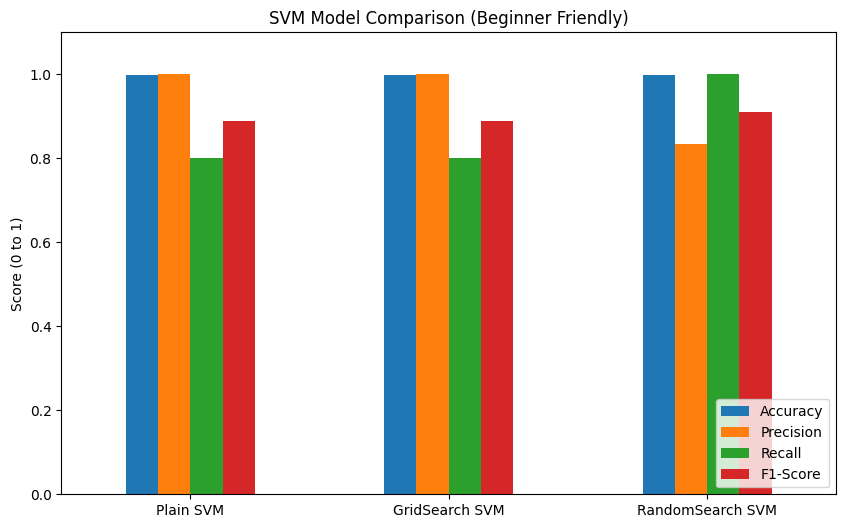

In [11]:
#Comparing 3 methods
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# y_pred_plain, y_pred_grid, y_pred_random
# y_test = actual labels

# Step 6: Collect results
results = {
    "Plain SVM": {
        "Accuracy": accuracy_score(y_test, y_pred_plain),
        "Precision": precision_score(y_test, y_pred_plain, pos_label=1),
        "Recall": recall_score(y_test, y_pred_plain, pos_label=1),
        "F1-Score": f1_score(y_test, y_pred_plain, pos_label=1)
    },
    "GridSearch SVM": {
        "Accuracy": accuracy_score(y_test, y_pred_grid),
        "Precision": precision_score(y_test, y_pred_grid, pos_label=1),
        "Recall": recall_score(y_test, y_pred_grid, pos_label=1),
        "F1-Score": f1_score(y_test, y_pred_grid, pos_label=1)
    },
    "RandomSearch SVM": {
        "Accuracy": accuracy_score(y_test, y_pred_random),
        "Precision": precision_score(y_test, y_pred_random, pos_label=1),
        "Recall": recall_score(y_test, y_pred_random, pos_label=1),
        "F1-Score": f1_score(y_test, y_pred_random, pos_label=1)
    }
}


# Convert to DataFrame for easy display
df_results = pd.DataFrame(results).T
print("\n--- Comparative Results ---\n")
print(df_results)

# Step 7: Simple Bar Chart
df_results.plot(kind="bar", figsize=(10, 6))
plt.title("SVM Model Comparison (Beginner Friendly)")
plt.ylabel("Score (0 to 1)")
plt.ylim(0, 1.1)  # Scores are between 0 and 1
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()


# This model did improve with RandomizedSearchCV in terms of catching all fraud cases, which is usually more important in fraud detection.

#Accuracy stays the same because it’s dominated by the large number of normal transactions.